# LOGISTIC REGRESSION 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv('titanic-passengers.csv', delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [16]:
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df['Cabin']=encoder.fit_transform(df['Cabin'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Age']=encoder.fit_transform(df['Age'])
df['Ticket']=encoder.fit_transform(df['Ticket'])
df['Name']=encoder.fit_transform(df['Name'])
df['Sex']=encoder.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,170,1,36,0,0,159,13.0000,147,2
1,76,0,3,546,1,33,0,0,347,7.6500,140,2
2,641,0,3,397,1,25,0,0,409,7.8542,147,2
3,568,0,3,627,0,38,0,4,395,21.0750,147,2
4,672,0,1,202,1,41,1,0,569,52.0000,38,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,576,0,18,1,0,132,30.0708,147,0
887,61,0,3,749,1,28,0,0,197,7.2292,147,0
888,535,0,3,123,0,39,0,0,260,8.6625,147,2
889,102,0,3,658,1,88,0,0,361,7.8958,147,2


# 1- Apply Logistic Regression 

In [17]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

LogisticRegression()

# 2. Use a confusion matrix to validate your model. 

In [21]:
train_preds = model.predict(X)


In [22]:
cm = confusion_matrix(Y, train_preds)


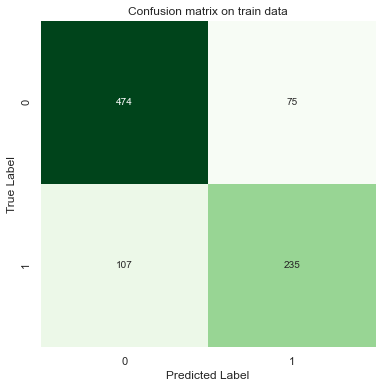

In [23]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3-Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_survival = roc_curve(df[['Survived']], train_preds )

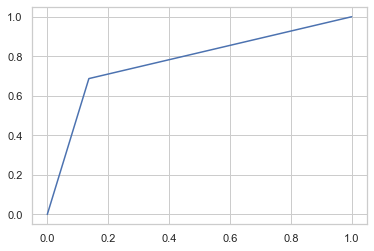

In [12]:
sns.set_style("whitegrid")
plt.plot(roc_survival[0], roc_survival[1])
plt.show()

Receiver Operating Characteristic (ROC) is another metric to evaluate classifier output quality using Recall (True Positive Rate) and FPR (False Positive Rate). For classification problems with very imbalanced data, the default threshold can result in poor model performance. ROC/AUC is often a better metric than accuracy for imbalancd data.



AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [13]:
vc = ensemble.VotingClassifier(
    estimators = [ ('gbc',GB_best), ('svc', SVC_best)],
    voting='soft', n_jobs=4)

NameError: name 'GB_best' is not defined

In [ ]:
vc = vc.fit(X, Y)
pred = vc.predict(X)
acc = accuracy_score(Y, pred) #Other way: vc.score(X_test, y_test)
f1 = f1_score(y_test, pred)
cv = cross_val_score(vc, X, Y).mean()

print("Accuracy: ", round(acc*100,2), "\nF1-Score: ", round(f1*100,2), "\nCV Score: ", round(cv*100,2))

In [ ]:
ada = ensemble.AdaBoostClassifier()
ada.fit(X, Y)

lg = linear_model.LogisticRegressionCV()
lg.fit(X, Y)

vc2 = ensemble.VotingClassifier(
    estimators = [('ada', ada), ('lg',lg), ('VotingClassifier', vc)],
    voting='soft', n_jobs=4)
vc2.fit(X, Y)

In [ ]:
y_scores = vc2.predict_proba(X_test)
y_scores = y_scores[:,1]

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, y_scores)

In [ ]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [ ]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)